<a href="https://colab.research.google.com/github/Maharshi-1234/Yes_Bank_Stock_Closing_Price_Prediction/blob/main/14060_YES_BANK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML PROJECT - YES BANK STOCK CLOSING PRICE PREDICTION USING MACHINE LEARNING**

**NAME** :    M.Ramana Maharshi

**REGD_NO** : 221FA14060

**DEPARTMENT** : Bioinformatics(**BI**)

# **Summary of the Project**

Yes Bank, founded in 2004, is a banking institution offering a broad range of products for both corporate and retail customers through its retail banking and asset management services. As a publicly traded company, it provides an opportunity for individuals to invest in the bank and become shareholders. However, this also means that the company's valuation is influenced by investors and speculators, as share prices are often driven by public opinion.

We utilized a dataset of Yes Bank's stock prices, which contains five key features that can be used to predict the **Closing price.** For this task, I Had developed a machine learning regression model and employed some of the top-performing models for price prediction.

# **GitHub Link -**

**PROBLEM STATEMENT**

Yes Bank is a prominent player in the Indian financial sector. Since 2018, the bank has faced significant media attention due to a fraud case involving its co-founder, Rana Kapoor. This event had a notable impact on the company's stock prices, making it an intriguing case for analysis. The goal is to explore how such events affect stock market behavior and whether time series models or other predictive techniques can accurately capture these fluctuations.

The dataset contains monthly stock prices of Yes Bank from its inception, including the opening, closing, highest, and lowest prices for each month. The challenge is to leverage this data to predict future stock prices and assess the effectiveness of different models in such volatile scenarios.

# **Importing libraries**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


# **Load the Data**

In [35]:
df =pd.read_csv('/content/Dataset_Yes_Bank_Price.csv')

In [36]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [37]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


#**Description of Data**

In [38]:
len(df)

185

In [39]:
df.shape

(185, 5)

In [40]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [42]:
df['Date'] =pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

## **EXPLORATORY DATA ANALYSIS**

## **Univariate Analysis**

In [43]:
col = list(df.columns)

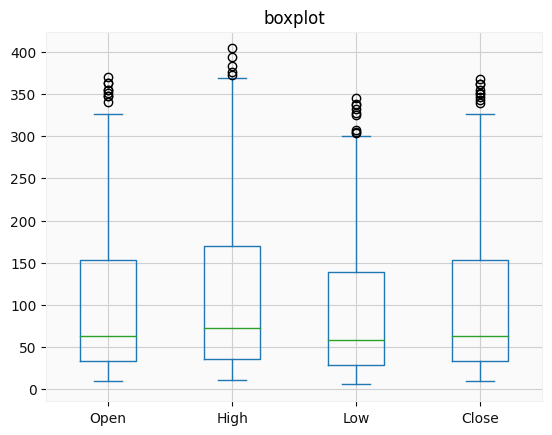

In [44]:
ax = df[col].plot(kind='box', title='boxplot')

plt.show()





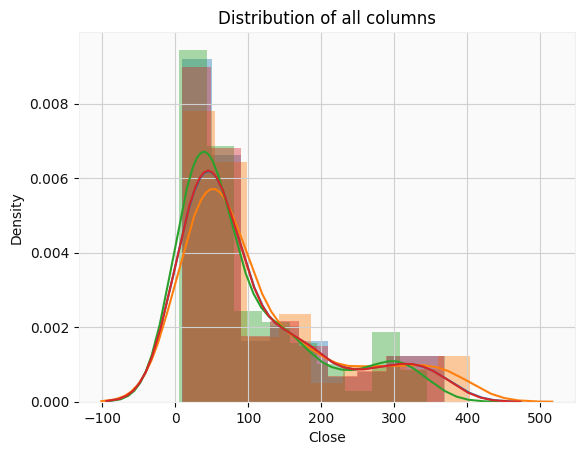

In [45]:
sns.distplot(df['Open'],kde=True)
sns.distplot(df['High'],kde=True)
sns.distplot(df['Low'],kde=True)
sns.distplot(df['Close'],kde=True)
plt.title("Distribution of all columns")
plt.show()



## **Bivariate** **Analysis**

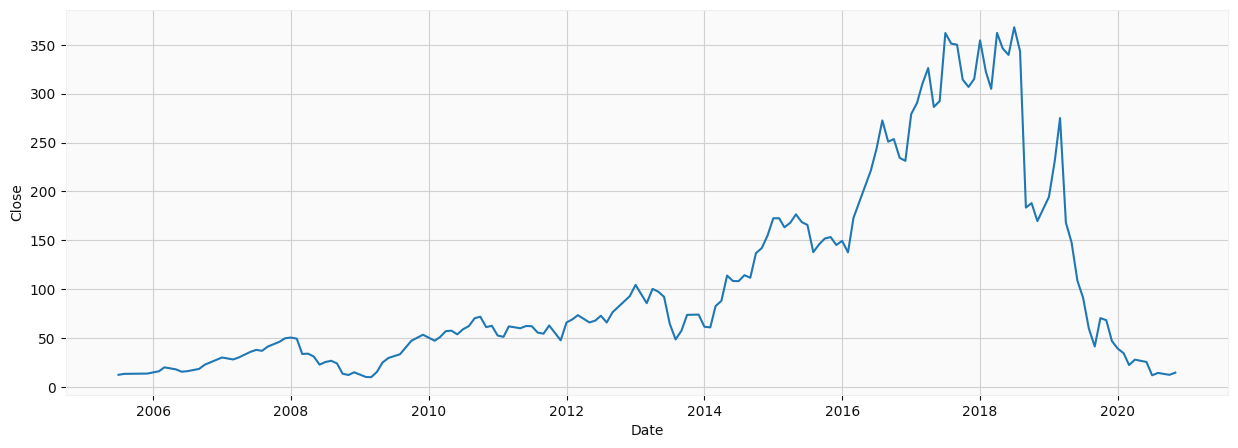

In [46]:

plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Close',data=df)
plt.show()

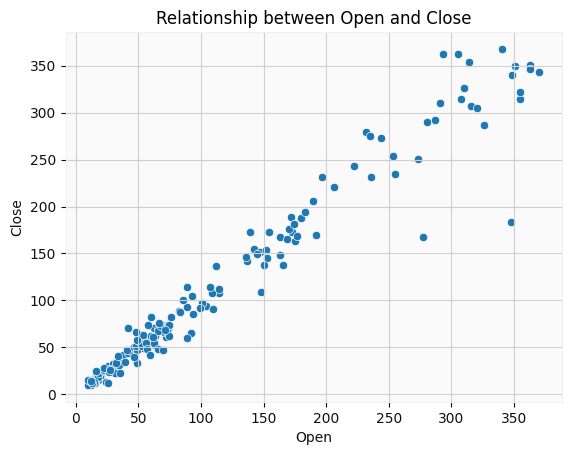

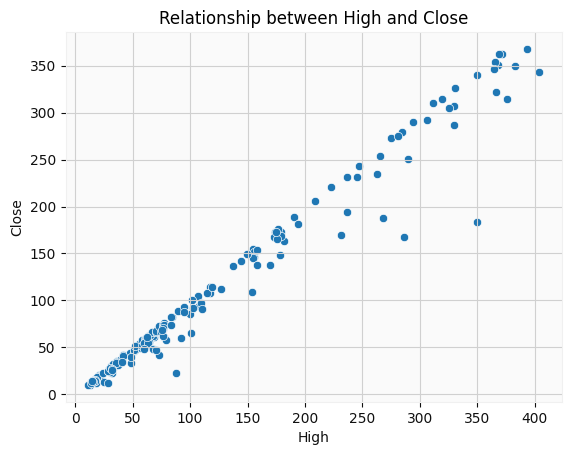

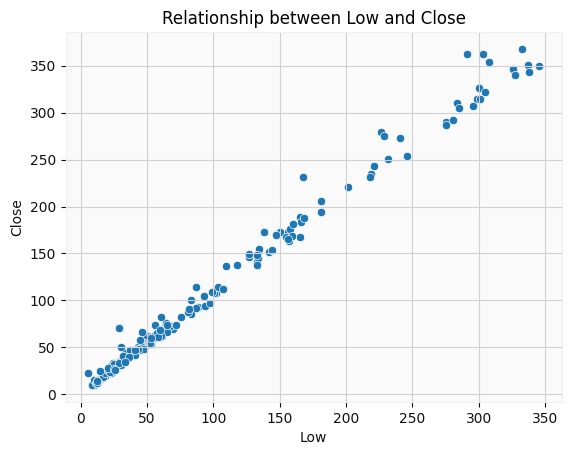

In [47]:
for i in df.columns[1:-1]:
  plt.title(f'Relationship between {i} and Close')
  sns.scatterplot(x=i,y='Close',data=df)
  plt.show()

In [48]:
df.set_index('Date',inplace=True)

In [49]:

!pip install mplfinance

import mplfinance as mpf

df_candle = df[['Open', 'High', 'Low', 'Close']]



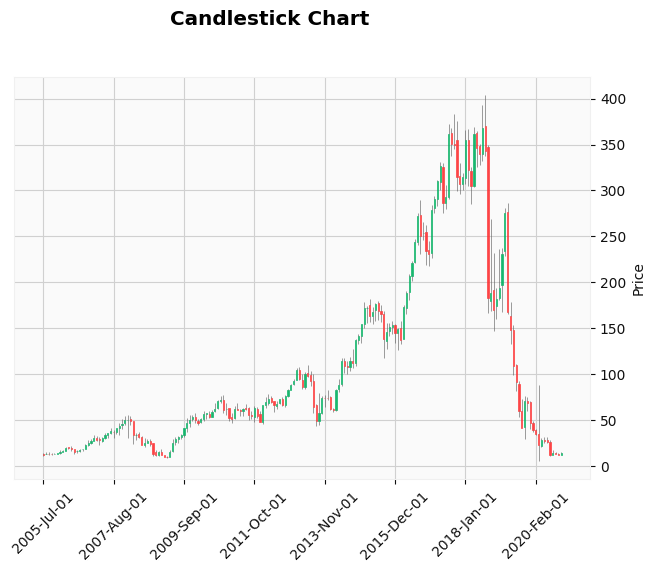

In [50]:

mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

## **Multivariate Analysis**

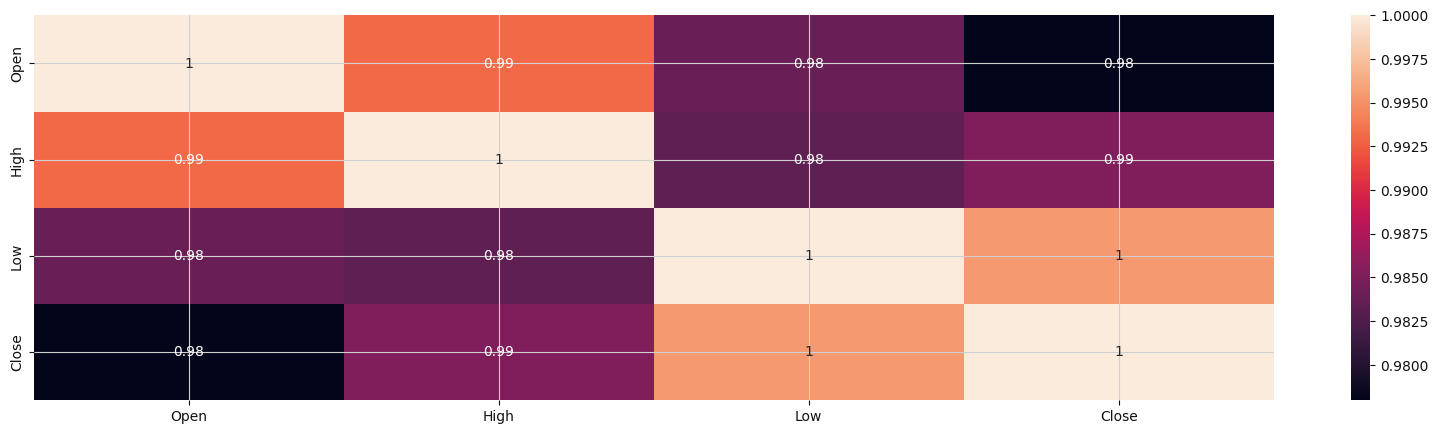

In [51]:
plt.figure(figsize=(20,5))
cor = sns.heatmap(df.corr(),annot=True)

Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

we will try to reducing multicollinearity using transformation of variables

In [52]:
pw = PowerTransformer(method='box-cox',standardize=True)

In [53]:
cf= df[list(df.columns)]

In [54]:
df['Close']

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42
2005-09-01,13.30
2005-10-01,12.99
2005-11-01,13.41
...,...
2020-07-01,11.95
2020-08-01,14.37
2020-09-01,13.15


In [55]:
kf = pd.DataFrame(pw.fit_transform(cf))

In [56]:
kf.head()

,0,1,2,3
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [57]:
kf.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)

<Axes: >

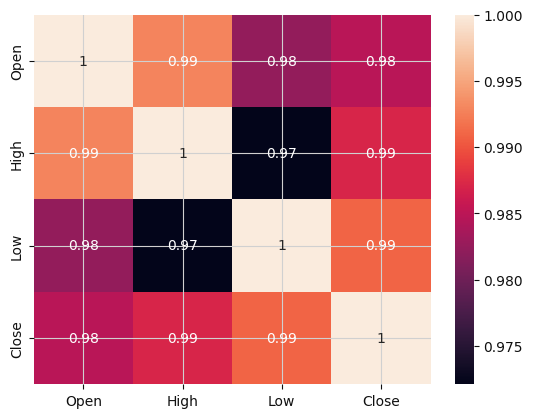

In [58]:
sns.heatmap(kf.corr(),annot=True)

In [59]:
col = list(kf.columns)

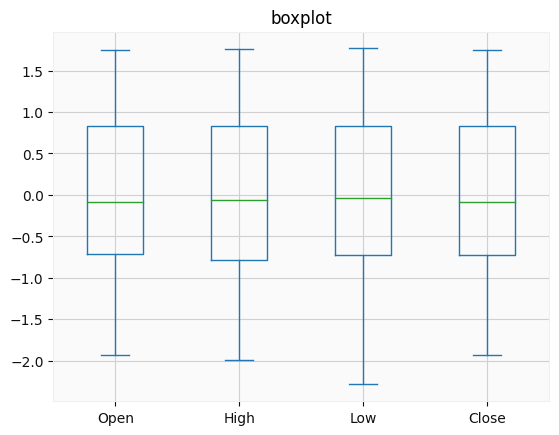

In [60]:
ax = kf[col].plot(kind='box', title='boxplot')

plt.show()

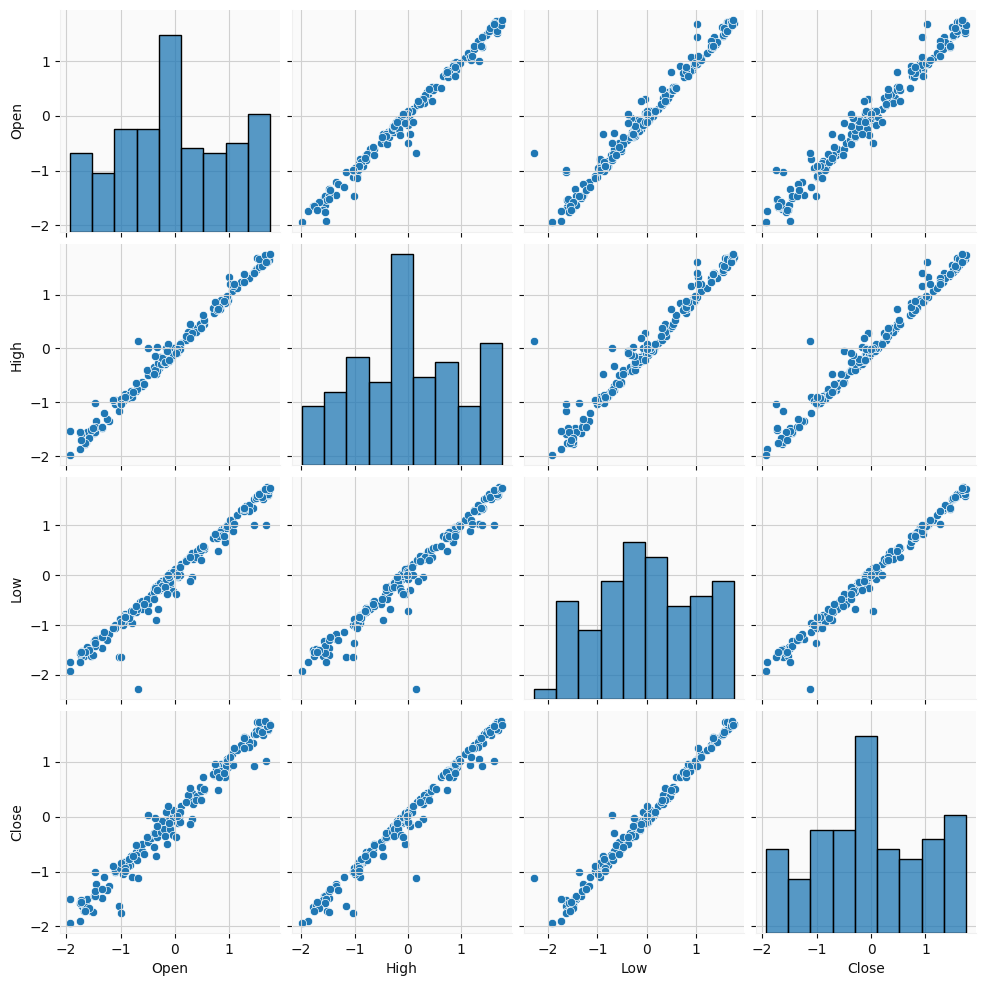

In [61]:
sns.pairplot(kf)

## Data Preprocessing

In [62]:
kf.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [63]:
dependent_variable = 'Close'
independent_variable = list(set(kf.columns.tolist())-{dependent_variable})

In [64]:
x=df[independent_variable].values

In [65]:
y=df[dependent_variable].values

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Linear Regression

In [67]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [68]:
y_pred = reg.predict(x_test)

In [69]:
linear_r2 = r2_score(y_pred,y_test)

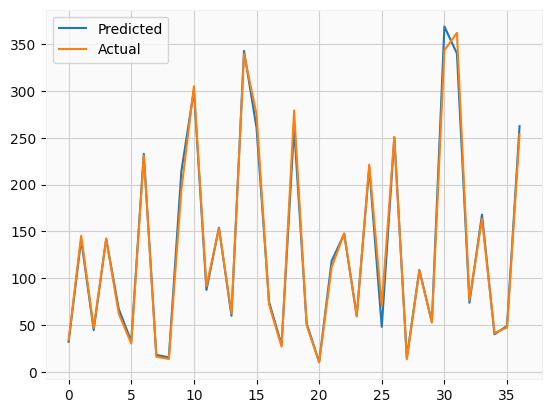

In [70]:
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# KNN

In [71]:
knn = KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
model = GridSearchCV(knn,params,cv=5)

In [72]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [73]:
model.best_params_

{'n_neighbors': 2}

In [74]:
knn = KNeighborsRegressor(n_neighbors=2)

In [75]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [76]:
knn_pred = knn.predict(x_test)

In [77]:
r2_knn = r2_score(y_test,knn_pred)

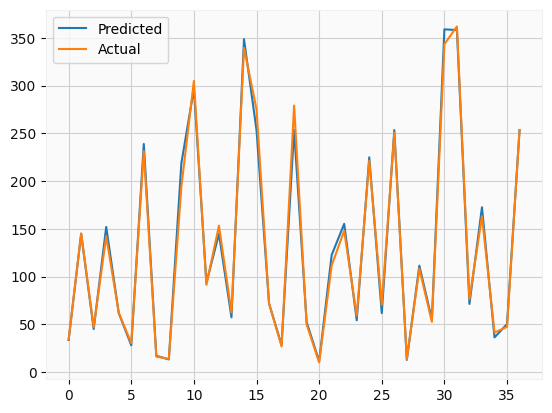

In [78]:
plt.plot(knn_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# RandomForest

In [79]:
rf = RandomForestRegressor()
params = {'n_estimators':[100,200,300],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(rf,params,cv=5)

In [80]:
rf_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [81]:
rf_model.best_params_

{'criterion': 'poisson', 'max_features': None, 'n_estimators': 100}

In [82]:
rf = RandomForestRegressor(criterion= 'friedman_mse', max_features= None, n_estimators= 300)

In [83]:
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_features=None,
                      n_estimators=300)

In [84]:
rf_predict_ = rf.predict(x_test)

In [85]:
rf_r2 = r2_score(y_test,rf_predict_)

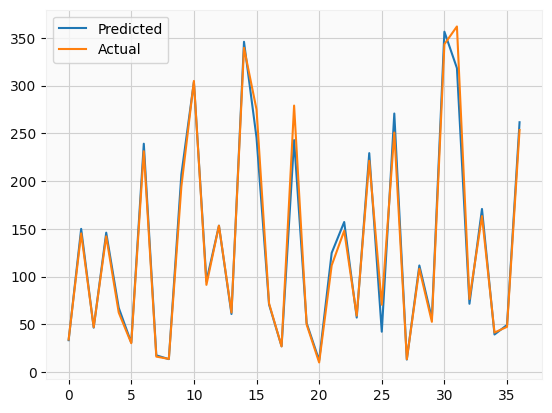

In [86]:
plt.plot(rf_predict_)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# Ridge Regression

In [87]:
ridge =Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)
ridge_regressor.best_params_


{'alpha': 100}

In [88]:
ridge =Ridge(alpha= 100)

In [89]:
ridge.fit(x_train,y_train)

Ridge(alpha=100)

In [90]:
y_pred_ridge = ridge.predict(x_test)

In [91]:
ridge_r2 = r2_score(y_test,y_pred_ridge)

In [92]:
ridge_r2

0.9930447012730752

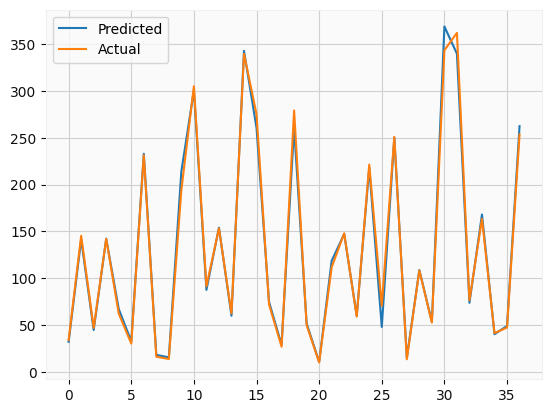

In [93]:
plt.plot(y_pred_ridge)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#Lasso

In [94]:
lasso =Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [95]:
lasso_regressor.best_params_

{'alpha': 2.5}

In [96]:
lasso =Lasso(alpha= 1.6)

In [97]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.6)

In [98]:
lasso_predict = lasso.predict(x_test)

In [99]:
lasso_r2 = r2_score(lasso_predict,y_test)

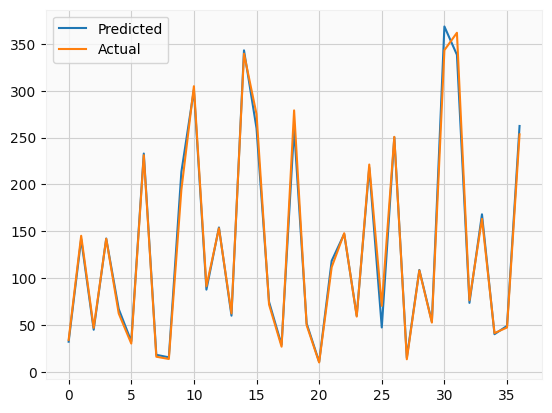

In [100]:
plt.plot(lasso_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# Evaluation Summary

In [111]:
Report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression','knn regression','RandomForest Regression'],'r2_score':[linear_r2,ridge_r2,lasso_r2,elastic_r2,r2_knn,rf_r2]})


In [112]:
Report.sort_values(by=['r2_score'],ascending=False,inplace=True)

In [113]:
Report

,model,r2_score
4,knn regression,0.993115
0,linear regression,0.993056
1,ridge regression,0.993045
2,lasso regression,0.992793
3,elastic net regression,0.992705
5,RandomForest Regression,0.984871


# **Conclusions Drawn :**
---

*   **Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.**
*   **After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.**
*   **There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.**
*   **We found that the distribution of all our variables is positively skewed. so we performed power transformation on them.**
*   **There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.**
*   **We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.**
*   **We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and knn regressor is the best performing model with A R2 score value of 0.993115 and scores well on all evaluation metrics.**

